In [559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import constants
%matplotlib inline

Defining the Variables

In [560]:
# Parametersfor the benchmarking
fps=295
num_particles=1000
dt=1.0/fps
spatial_resolution=30E-06  # in metres per px
dust_diameter=7.14E-6 # in metres
dust_rho=1510.0
mu = 0
mass = 4.0 / 3.0 * np.pi * ( dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
# print(mass)
kb=constants.Boltzmann
T=1000 #temperature in Kelvin
sigma = np.sqrt(kb*T/mass)
print(sigma)

left=0
right=1751 # right border in px as per the camera of expt
up=1667 # up border in px as per the camera of expt
down=0
left_SI=left*spatial_resolution
right_SI=right*spatial_resolution

0.00021903148058823087


Generating initial x coordinates

In [561]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x=unif_x.rvs(num_particles)
# print(sample_x)
# fig, ax = plt.subplots()
# ax.hist(sample_v,100) # plot histogram
# ax.set_xlabel('x')
# ax.set_ylabel('measurements')
# print(sample_x_trunc)
# print(sample_x)
sample_x_in_resol= sample_x/spatial_resolution
# print(sample_x_in_resol[:10])
sample_x_trunc= sample_x_in_resol.astype(int)
# print(sample_x_trunc[:10])
sample_x_trunc_SI=sample_x_trunc.astype(float)*spatial_resolution

print(sample_x_trunc_SI)
# print(sample_x_SI)

[3.924e-02 4.419e-02 4.689e-02 2.742e-02 2.253e-02 1.050e-03 5.550e-03
 3.603e-02 2.064e-02 3.768e-02 4.977e-02 2.166e-02 1.965e-02 2.217e-02
 7.890e-03 5.100e-02 1.380e-02 1.467e-02 3.339e-02 3.915e-02 4.980e-03
 2.004e-02 2.178e-02 1.737e-02 1.683e-02 3.321e-02 2.769e-02 4.440e-03
 5.148e-02 1.794e-02 1.191e-02 1.863e-02 1.104e-02 2.370e-03 4.545e-02
 2.733e-02 1.665e-02 1.215e-02 2.304e-02 4.818e-02 3.264e-02 2.814e-02
 1.515e-02 2.610e-02 1.002e-02 3.360e-02 4.641e-02 5.460e-03 1.221e-02
 3.321e-02 1.494e-02 6.150e-03 1.203e-02 3.831e-02 3.600e-02 4.626e-02
 2.856e-02 4.320e-03 5.670e-03 2.787e-02 3.924e-02 5.280e-03 3.627e-02
 1.179e-02 3.468e-02 3.285e-02 1.089e-02 2.895e-02 1.692e-02 2.433e-02
 2.430e-03 2.010e-03 1.332e-02 3.930e-02 5.226e-02 7.530e-03 2.082e-02
 4.986e-02 9.660e-03 2.046e-02 4.269e-02 4.896e-02 3.954e-02 3.462e-02
 5.145e-02 5.175e-02 3.420e-03 1.404e-02 3.690e-02 6.360e-03 5.241e-02
 2.853e-02 4.176e-02 1.827e-02 3.543e-02 1.350e-03 1.110e-02 1.158e-02
 3.696

In [562]:
part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
# part_no

Generating velocities

Text(0, 0.5, 'measurements')

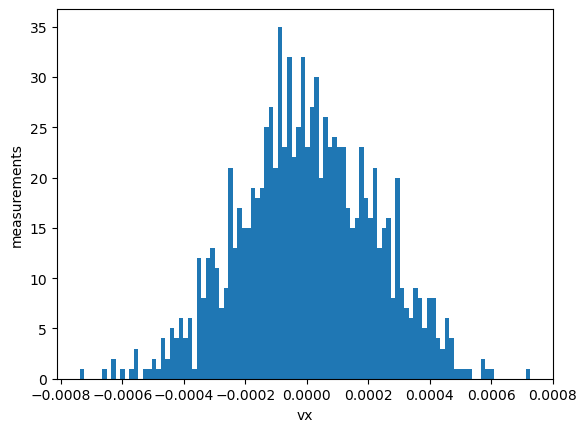

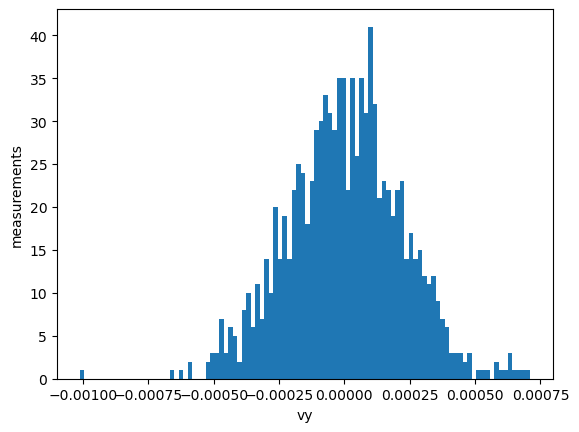

In [563]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
sample_vy= norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vx, 100) # plot histogram
ax.set_xlabel('vx')
ax.set_ylabel('measurements')
fig, ax = plt.subplots()
ax.hist(sample_vy, 100) # plot histogram
ax.set_xlabel('vy')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating cordinates in next frame

Text(0, 0.5, 'measurements')

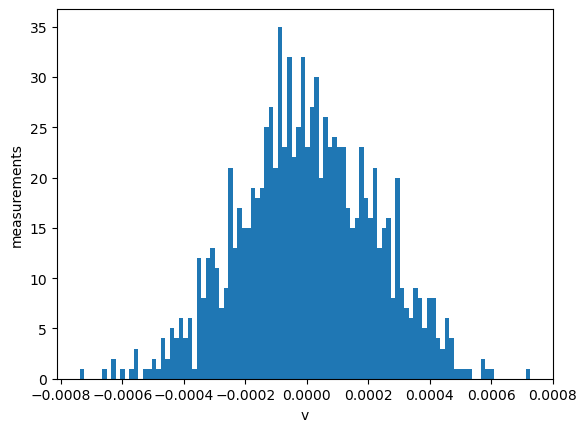

In [564]:
# Simulating the motion of the particles
x_forward=sample_x_trunc_SI+sample_vx*dt
x_forward_in_resol=x_forward/spatial_resolution
x_forward_trunc=x_forward_in_resol.astype(int)
# print(x_forward_trunc)
x_forward_SI=x_forward_trunc.astype(float)*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vx, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating the discrepancies

In [565]:
# Calculating restored velocities
v_restored=(x_forward_SI- sample_x_trunc_SI)/dt
print(v_restored)
# fig, ax = plt.subplots()
# ax.hist(v_restored, 10) # plot histogram
# ax.set_xlabel('v')
# ax.set_ylabel('measurements')

# print(sample_vx[:10])

# Calculating the discrepancy between the original and restored velocities
discrepancy=np.abs(sample_vx-v_restored)
print(np.mean(discrepancy))
frac_discrepancy=np.abs(discrepancy/sample_vx)
print(np.mean(frac_discrepancy))
percent_discrepancy=frac_discrepancy*100
print(np.mean(percent_discrepancy))

[-0.00885 -0.00885  0.       0.       0.      -0.00885 -0.00885 -0.00885
  0.      -0.00885  0.      -0.00885  0.      -0.00885 -0.00885 -0.00885
 -0.00885 -0.00885 -0.00885 -0.00885  0.       0.       0.       0.
  0.       0.      -0.00885 -0.00885  0.      -0.00885  0.      -0.00885
  0.      -0.00885  0.       0.       0.       0.      -0.00885  0.
 -0.00885 -0.00885 -0.00885  0.       0.       0.      -0.00885  0.
  0.      -0.00885  0.      -0.00885  0.      -0.00885  0.      -0.00885
 -0.00885  0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.      -0.00885 -0.00885 -0.00885  0.       0.
  0.      -0.00885  0.       0.      -0.00885 -0.00885  0.      -0.00885
 -0.00885  0.       0.       0.       0.       0.      -0.00885  0.
 -0.00885 -0.00885 -0.00885 -0.00885  0.      -0.00885  0.       0.
 -0.00885  0.      -0.00885  0.       0.      -0.00885 -0.00885  0.
 -0.00885  0.       0.      -0.00885  0.      -0.00885  0.      -0.00885
  0.       0.     

Code to simulate motion in y

In [566]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_y = sts.uniform(left_SI, right_SI-left_SI)
sample_y=unif_y.rvs(num_particles)
sample_y_in_resol= sample_y/spatial_resolution
# print(sample_x_trunc)
sample_y_trunc= sample_y_in_resol.astype(int)
# print(sample_x_trunc)
sample_y_trunc_SI=sample_y_trunc.astype(float)*spatial_resolution
# print(sample_y_trunc_SI
    #)
# print(sample_x_SI)

Text(0, 0.5, 'measurements')

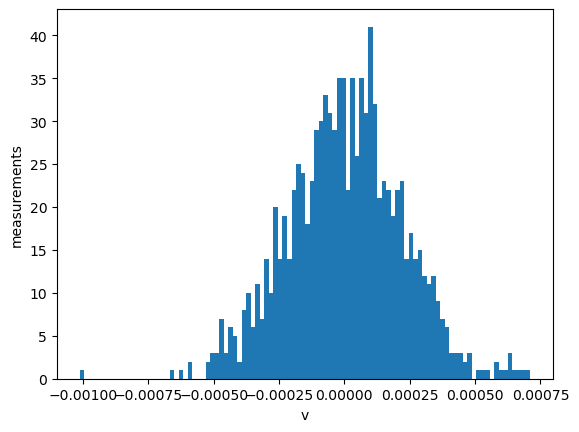

In [567]:
# Simulating the motion of the particles
y_forward=sample_y_trunc_SI+sample_vy*dt
y_forward_in_resol=y_forward/spatial_resolution
y_forward_trunc=y_forward_in_resol.astype(int)
# print(x_forward_trunc)
y_forward_SI=y_forward_trunc.astype(float)*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vy, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Making the database of co-ordinates

In [568]:
def make_coord_df(init_frame,final_frame, num_particles, init_x_trunc_SI, init_y_trunc_SI, sample_vx,sample_vy, dt,spatial_resolution):
    frame_data = []
    while init_frame <= final_frame:
        # Simulating the motion of the particles for x coordinates
        x_forward = init_x_trunc_SI + sample_vx * dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype(int)
        x_forward_SI = x_forward_trunc.astype(float) * spatial_resolution

        # Simulating the motion of the particles for y coordinates
        y_forward = init_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype(int)
        y_forward_SI=y_forward_trunc.astype(float)*spatial_resolution

        # Calculating restored velocities
        v_restored_x=(x_forward_SI- init_x_trunc_SI)/dt
        v_restored_y=(y_forward_SI- init_y_trunc_SI)/dt

        for j in range(num_particles):
            # Append the data for the current frame
            frame_data.append([init_x_trunc_SI[j], init_y_trunc_SI[j], j,sample_vx[j],sample_vy[j],v_restored_x[j],v_restored_y[j],init_frame])
        
        # Update the initial positions for the next frame
        init_x_trunc_SI = x_forward_SI
        init_y_trunc_SI = y_forward_SI
        init_frame += 1
    # Create a DataFrame
    x_y_df = pd.DataFrame(frame_data, columns=['x', 'y', 'part_no', 'vx (unrestored)','vy (unrestored)','vx (restored)','vy (restored)','frame'])
    return x_y_df


In [569]:
coord_df=make_coord_df(1,2, num_particles, sample_x_trunc_SI, sample_y_trunc_SI,sample_vx,sample_vy, dt,spatial_resolution)
print(coord_df[coord_df['frame'] == 1]['vx (restored)'])
# coord_df

0     -0.00885
1     -0.00885
2      0.00000
3      0.00000
4      0.00000
        ...   
995   -0.00885
996   -0.00885
997    0.00000
998    0.00000
999    0.00000
Name: vx (restored), Length: 1000, dtype: float64


Function to get the discrepancies

In [570]:
def get_percent_discrepancies(v_restored,v_actual):
    discrepancy = np.abs(v_actual - v_restored)
    # print(np.mean(discrepancy))
    frac_discrepancy = np.abs(discrepancy / v_actual)
    # print(np.mean(frac_discrepancy))
    percent_discrepancy = frac_discrepancy*100
    # print(np.mean(percent_discrepancy))
    return np.mean(percent_discrepancy)

In [571]:
get_percent_discrepancies(v_restored,sample_vx)

9216.845153154996

Function to create the database of velocities

In [572]:
def make_velocities(fps,num_particles,spatial_resolution, mu,T, right_border_px, up_border_px):
    init_frame=1
    final_frame=3 #using it as 2 now will parametrise it when making a general function
    dt=1/fps
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    sigma = np.sqrt(kb*T/mass)
    # print(sigma)
    left=0
    down=0
    down_SI=down*spatial_resolution
    left_SI=left*spatial_resolution
    up_SI=up_border_px*spatial_resolution
    right_SI=right_border_px*spatial_resolution
    # Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
    unif_x = sts.uniform(left_SI, right_SI-left_SI)
    sample_x=unif_x.rvs(num_particles)
    sample_x_in_resol= sample_x/spatial_resolution
    sample_x_trunc= sample_x_in_resol.astype(int)
    sample_x_trunc_SI=sample_x_trunc*spatial_resolution
    
    unif_y = sts.uniform(down_SI, up_SI-down_SI)
    sample_y=unif_y.rvs(num_particles)
    sample_y_in_resol= sample_y/spatial_resolution
    sample_y_trunc= sample_y_in_resol.astype(int)
    sample_y_trunc_SI=sample_y_trunc*spatial_resolution
    # Generate a sample of 1000 random velocities from a normal distribution
    norm_rv = sts.norm(mu, sigma)
    sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
    norm_rv = sts.norm(mu, sigma)
    sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
    
    # # Simulating the motion of the particles for x coordinates
    # x_forward = sample_x_trunc_SI + sample_vx * dt
    # x_forward_in_resol = x_forward / spatial_resolution
    # x_forward_trunc = x_forward_in_resol.astype(int)
    # x_forward_SI = x_forward_trunc.astype(float) * spatial_resolution

    # # Simulating the motion of the particles for y coordinates
    # y_forward = sample_y_trunc_SI + sample_vy * dt
    # y_forward_in_resol = y_forward / spatial_resolution
    # y_forward_trunc = y_forward_in_resol.astype(int)
    # y_forward_SI=y_forward_trunc.astype(float)*spatial_resolution

    # # Calculating restored velocities
    # v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
    # v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt
    coord_df=make_coord_df(init_frame,final_frame, num_particles, sample_x_trunc_SI, sample_y_trunc_SI,sample_vx,sample_vy, dt,spatial_resolution)
    return coord_df

In [573]:
coord_df=make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up)

# print(coord_df['vx (unrestored)'].mean())
# print(coord_df['vx(restored)'].mean())

# print(np.abs((coord_df['vx (unrestored)'].mean()-coord_df['vx(restored)'].mean())/coord_df['vx (unrestored)'].mean()))


In [574]:
# print(coord_df[coord_df['frame'] == 1]['vx (restored)'])
print(np.count_nonzero(coord_df[coord_df['frame'] == 2]['vx (restored)']))

510


In [575]:
fps_arr=[100,200,300,400,800,1600,3200]
disc_arr=[]

for i in fps_arr:
    coord_df=make_coord_df(1,2, num_particles, sample_x_trunc_SI, sample_y_trunc_SI,sample_vx,sample_vy, 1/i,spatial_resolution)
    # print(coord_df['vx (unrestored)'].mean())
    # print(coord_df['vx(restored)'].mean())
    disc=get_percent_discrepancies(coord_df['vx (restored)'],coord_df['vx (unrestored)'])
    # disc=(np.abs((coord_df['vx (unrestored)'].mean()-coord_df['vx(restored)'].mean())/coord_df['vx (unrestored)'].mean()))
    np.append(disc_arr,disc)
    print(disc)


3123.8254756457163
6248.450951291434
9373.07642693715
12497.701902582867
24996.203805165733
49993.20761033147
99987.21522066294


In [ ]:
def make_make_velocities_complete(fps,num_particles,spatial_resolution, mu,T, right_border_px, up_border_px, final_frame):
    init_frame=1
    # final_frame=3 #using it as 2 now will parametrise it when making a general function
    dt=1.0/fps
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    sigma = np.sqrt(kb*T/mass)
    # print(sigma)
    left=0
    down=0
    down_SI=down*spatial_resolution
    left_SI=left*spatial_resolution
    up_SI=up_border_px*spatial_resolution
    right_SI=right_border_px*spatial_resolution
    # Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
    
    unif_x = sts.uniform(left_SI, right_SI-left_SI)
    sample_x=unif_x.rvs(num_particles)
    sample_x_in_resol= sample_x/spatial_resolution
    sample_x_trunc= sample_x_in_resol.astype(int)
    sample_x_trunc_SI=sample_x_trunc*spatial_resolution
    unif_y = sts.uniform(down_SI, up_SI-down_SI)
    sample_y=unif_y.rvs(num_particles)
    sample_y_in_resol= sample_y/spatial_resolution
    sample_y_trunc= sample_y_in_resol.astype(int)
    sample_y_trunc_SI=sample_y_trunc*spatial_resolution
    frame_data = []
    norm_rv = sts.norm(mu, sigma)
    while init_frame <= final_frame:
        sample_vx = norm_rv.rvs(num_particles)
        sample_vy = norm_rv.rvs(num_particles)
        # Simulating the motion of the particles for x coordinates
        x_forward = sample_x_trunc_SI + sample_vx * dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype(int)
        x_forward_SI = x_forward_trunc.astype(float) * spatial_resolution
        # Simulating the motion of the particles for y coordinates
        y_forward = sample_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype(int)
        y_forward_SI=y_forward_trunc.astype(float)*spatial_resolution
        # Calculating restored velocities
        v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
        v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt

        for j in range(num_particles):
            # Append the data for the current frame
            frame_data.append([sample_x_trunc_SI[j], sample_y_trunc_SI[j], j,sample_vx[j],sample_vy[j],v_restored_x[j],v_restored_y[j],init_frame])
        # Update the initial positions for the next frame
        sample_x_trunc_SI = x_forward_SI
        sample_y_trunc_SI = y_forward_SI
        init_frame += 1
    # Create a DataFrame
    coord_df = pd.DataFrame(frame_data, columns=['x', 'y', 'part_no', 'vx (unrestored)','vy (unrestored)','vx (restored)','vy (restored)','frame'])
    return coord_df

In [609]:
coord_df=make_make_velocities_complete(100,num_particles,spatial_resolution, mu,T, right, up,6)
print(coord_df['vx (restored)'])

coord_df.to_csv('coord_df.csv', index=False)   

0       0.000
1      -0.003
2      -0.003
3       0.000
4       0.000
        ...  
5995    0.000
5996   -0.003
5997    0.000
5998   -0.003
5999    0.000
Name: vx (restored), Length: 6000, dtype: float64
